In [ ]:
pip install kaggle

In [ ]:
 from google.colab import files
 files.upload()

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
 !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

In [ ]:
! kaggle datasets download  'nsharan/h-1b-visa'

h-1b-visa.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip "h-1b-visa.zip"

Archive:  h-1b-visa.zip
replace h1b_kaggle.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# SOURCE:
- kaggle dataset



## DATASET DESCRIBTION
 #### H-1B visas are a category of employment-based, non-immigrant visas for temporary foreign workers in the United States. For a foreign national to apply for H1-B visa, a US employer must offer them a job and submit a petition for a H-1B visa to the US immigration department. This is also the most common visa status applied for and held by international students once they complete college or higher education and begin working in a full-time position.
- This dataset contains five year's worth of H-1B petition data, with approximately 3 million records overall. The columns in the dataset include case status, employer name, worksite coordinates, job title, prevailing wage, occupation code, and year filed.

In [ ]:
df = pd.read_csv("h1b_kaggle.csv")

In [ ]:
df

Unnamed: 0          CASE_STATUS  \
0                 1  CERTIFIED-WITHDRAWN   
1                 2  CERTIFIED-WITHDRAWN   
2                 3  CERTIFIED-WITHDRAWN   
3                 4  CERTIFIED-WITHDRAWN   
4                 5            WITHDRAWN   
...             ...                  ...   
3002453     3002454                  NaN   
3002454     3002455                  NaN   
3002455     3002456                  NaN   
3002456     3002457                  NaN   
3002457     3002458                  NaN   

                                                       EMPLOYER_NAME  \
0                                             UNIVERSITY OF MICHIGAN   
1                                             GOODMAN NETWORKS, INC.   
2                                          PORTS AMERICA GROUP, INC.   
3        GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY OF TOMKINS PLC   
4                                          PEABODY INVESTMENTS CORP.   
...                                                              ...   
3002453                                                          NaN   
3002454                                                          NaN   
3002455                                                          NaN   
3002456                                                          NaN   
3002457                                                          NaN   

                              SOC_NAME                     JOB_TITLE  \
0        BIOCHEMISTS AND BIOPHYSICISTS  POSTDOCTORAL RESEARCH FELLOW   
1                     CHIEF EXECUTIVES       CHIEF OPERATING OFFICER   
2                     CHIEF EXECUTIVES         CHIEF PROCESS OFFICER   
3                     CHIEF EXECUTIVES   REGIONAL PRESIDEN, AMERICAS   
4                     CHIEF EXECUTIVES  PRESIDENT MONGOLIA AND INDIA   
...                                ...                           ...   
3002453                            NaN                           NaN   
3002454                            NaN                           NaN   
3002455                            NaN                           NaN   
3002456                            NaN                           NaN   
3002457                            NaN                           NaN   

        FULL_TIME_POSITION  PREVAILING_WAGE    YEAR                 WORKSITE  \
0                        N          36067.0  2016.0      ANN ARBOR, MICHIGAN   
1                        Y         242674.0  2016.0             PLANO, TEXAS   
2                        Y         193066.0  2016.0  JERSEY CITY, NEW JERSEY   
3                        Y         220314.0  2016.0         DENVER, COLORADO   
4                        Y         157518.4  2016.0      ST. LOUIS, MISSOURI   
...                    ...              ...     ...                      ...   
3002453                NaN              NaN     NaN            NYC, NEW YORK   
3002454                NaN              NaN     NaN        SOUTH LAKE, TEXAS   
3002455                NaN              NaN     NaN      CLINTON, NEW JERSEY   
3002456                NaN              NaN     NaN    OWINGS MILL, MARYLAND   
3002457                NaN              NaN     NaN         ALTANTA, GEORGIA   

                lon        lat  
0        -83.743038  42.280826  
1        -96.698886  33.019843  
2        -74.077642  40.728158  
3       -104.990251  39.739236  
4        -90.199404  38.627003  
...             ...        ...  
3002453  -74.005941  40.712784  
3002454  -97.134178  32.941236  
3002455  -74.909890  40.636768  
3002456  -76.780253  39.419550  
3002457  -84.387982  33.748995  

[3002458 rows x 11 columns]

In [ ]:
df.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [ ]:
df.shape

(3002458, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


In [ ]:
df.describe()

Unnamed: 0  PREVAILING_WAGE          YEAR           lon           lat
count  3.002458e+06     3.002373e+06  3.002445e+06  2.895216e+06  2.895216e+06
mean   1.501230e+06     1.469984e+05  2.013855e+03 -9.213441e+01  3.816054e+01
std    8.667351e+05     5.287609e+06  1.680612e+00  1.965591e+01  4.672835e+00
min    1.000000e+00     0.000000e+00  2.011000e+03 -1.578583e+02  1.343719e+01
25%    7.506152e+05     5.437100e+04  2.012000e+03 -1.119261e+02  3.416536e+01
50%    1.501230e+06     6.502100e+04  2.014000e+03 -8.615862e+01  3.910312e+01
75%    2.251844e+06     8.143200e+04  2.015000e+03 -7.551381e+01  4.088374e+01
max    3.002458e+06     6.997607e+09  2.016000e+03  1.457298e+02  6.483778e+01

## Check for null values

In [ ]:
df.isna().sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [ ]:
df.head()

Unnamed: 0          CASE_STATUS  \
0           1  CERTIFIED-WITHDRAWN   
1           2  CERTIFIED-WITHDRAWN   
2           3  CERTIFIED-WITHDRAWN   
3           4  CERTIFIED-WITHDRAWN   
4           5            WITHDRAWN   

                                                 EMPLOYER_NAME  \
0                                       UNIVERSITY OF MICHIGAN   
1                                       GOODMAN NETWORKS, INC.   
2                                    PORTS AMERICA GROUP, INC.   
3  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY OF TOMKINS PLC   
4                                    PEABODY INVESTMENTS CORP.   

                        SOC_NAME                     JOB_TITLE  \
0  BIOCHEMISTS AND BIOPHYSICISTS  POSTDOCTORAL RESEARCH FELLOW   
1               CHIEF EXECUTIVES       CHIEF OPERATING OFFICER   
2               CHIEF EXECUTIVES         CHIEF PROCESS OFFICER   
3               CHIEF EXECUTIVES   REGIONAL PRESIDEN, AMERICAS   
4               CHIEF EXECUTIVES  PRESIDENT MONGOLIA AND INDIA   

  FULL_TIME_POSITION  PREVAILING_WAGE    YEAR                 WORKSITE  \
0                  N          36067.0  2016.0      ANN ARBOR, MICHIGAN   
1                  Y         242674.0  2016.0             PLANO, TEXAS   
2                  Y         193066.0  2016.0  JERSEY CITY, NEW JERSEY   
3                  Y         220314.0  2016.0         DENVER, COLORADO   
4                  Y         157518.4  2016.0      ST. LOUIS, MISSOURI   

          lon        lat  
0  -83.743038  42.280826  
1  -96.698886  33.019843  
2  -74.077642  40.728158  
3 -104.990251  39.739236  
4  -90.199404  38.627003

In [ ]:
df = df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df.duplicated().sum() ## No duplicate values

934233

In [ ]:
df = df.dropna(axis=0,subset=["CASE_STATUS","EMPLOYER_NAME","JOB_TITLE","FULL_TIME_POSITION","PREVAILING_WAGE","YEAR","SOC_NAME"],how="any")

In [ ]:
df.shape

(2984609, 10)

**147 rows dropped. 147 rows in 3million records will not affect the end results much**

In [ ]:
df.isna().sum()

CASE_STATUS                0
EMPLOYER_NAME              0
SOC_NAME                   0
JOB_TITLE                  0
FULL_TIME_POSITION         0
PREVAILING_WAGE            0
YEAR                       0
WORKSITE                   0
lon                   106844
lat                   106844
dtype: int64

In [ ]:
df["CASE_STATUS"].value_counts().unique

<bound method Series.unique of CERTIFIED                                             2600241
CERTIFIED-WITHDRAWN                                    201479
DENIED                                                  93761
WITHDRAWN                                               89110
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64>

# Which company is recruiting most number of people from other countries

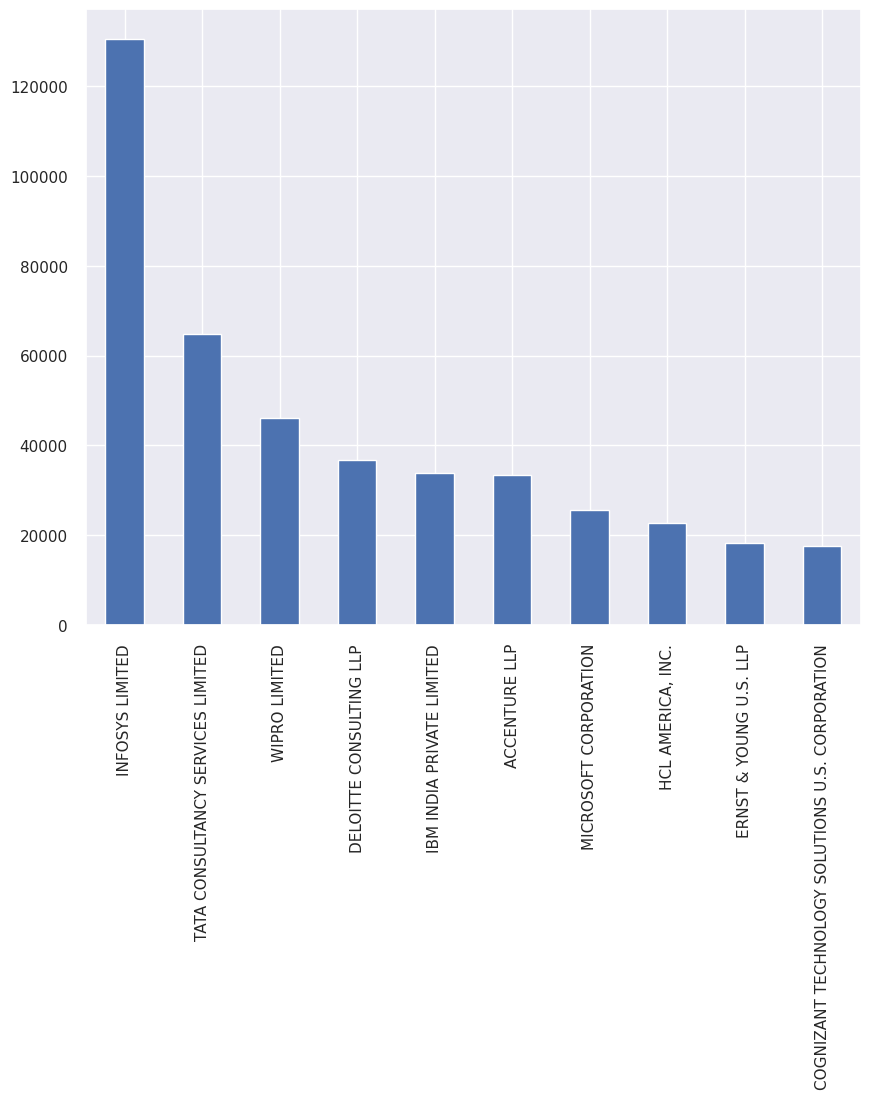

In [ ]:
  df["EMPLOYER_NAME"].value_counts()[0:10].plot(kind="bar",figsize=(10,8))

## INFOSYS IS RECRUITING MORE NUMBER OF PEOPLE FROM OTHER COUNTRIES

In [ ]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

## WHICH  JOB HAS HIGHEST NUMBER OF APPLICATIONS?
- PROGRAMMER ANALYST

In [ ]:
df["JOB_TITLE"].value_counts()[0:15]

PROGRAMMER ANALYST          247663
SOFTWARE ENGINEER           120581
COMPUTER PROGRAMMER          69952
SYSTEMS ANALYST              61815
SOFTWARE DEVELOPER           42803
BUSINESS ANALYST             39550
COMPUTER SYSTEMS ANALYST     34836
TECHNOLOGY LEAD - US         28350
SENIOR SOFTWARE ENGINEER     26865
TECHNOLOGY ANALYST - US      26055
ASSISTANT PROFESSOR          25256
SENIOR CONSULTANT            24616
CONSULTANT                   22998
PHYSICAL THERAPIST           20151
PROJECT MANAGER              19426
Name: JOB_TITLE, dtype: int64

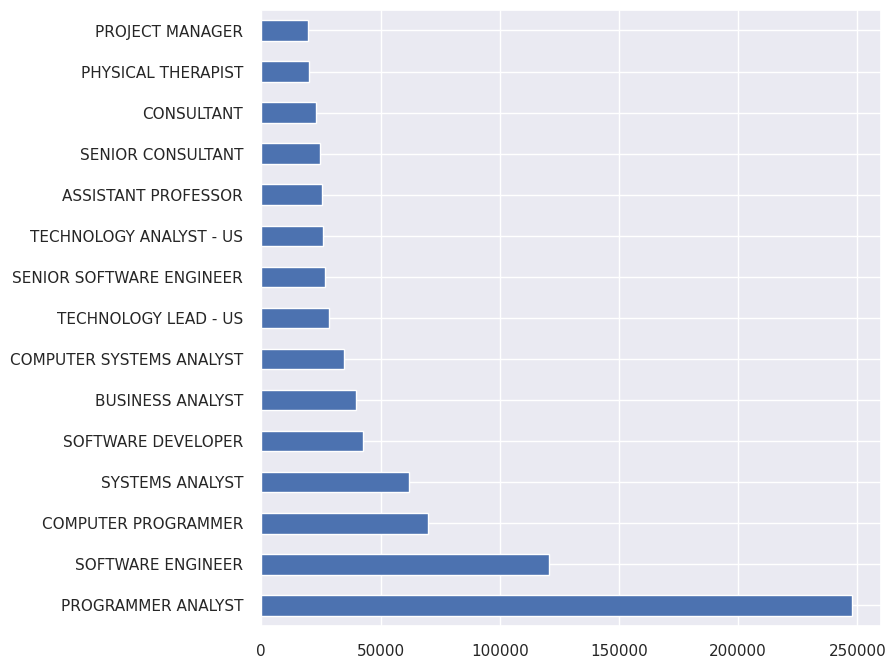

In [ ]:
df["JOB_TITLE"].value_counts()[0:15].plot(kind="barh",figsize=(8,8))

 ## How many applications have been rejected/approved?

- 87% applications are approved
- 3% applications are denied
- Nearly 10% are withdrawn


In [ ]:
df["CASE_STATUS"].value_counts()

CERTIFIED                                             2600241
CERTIFIED-WITHDRAWN                                    201479
DENIED                                                  93761
WITHDRAWN                                               89110
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

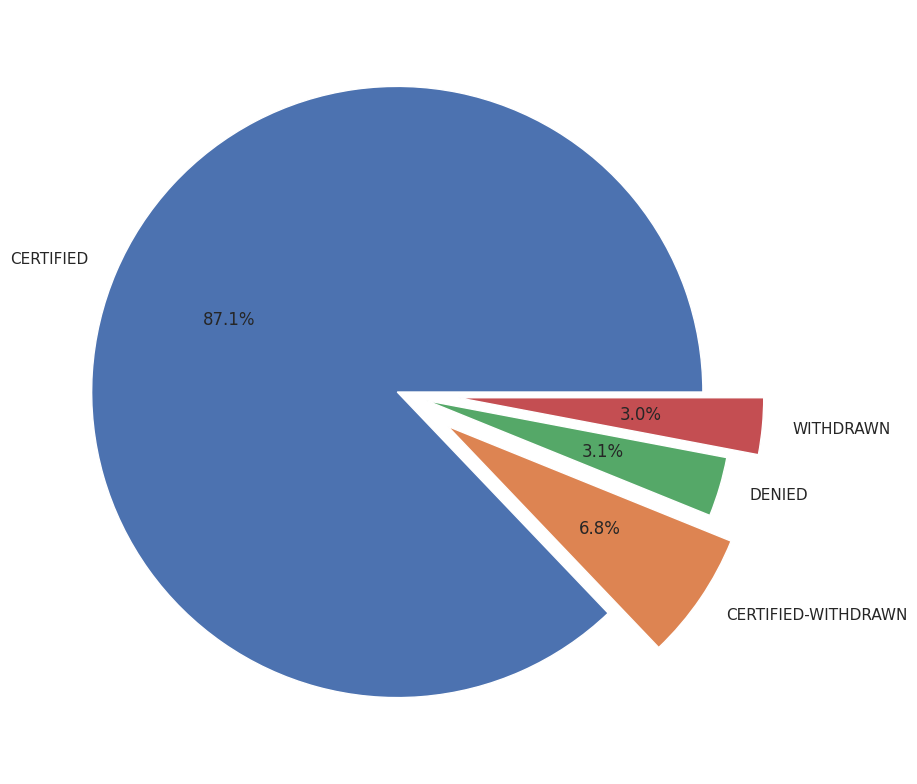

In [ ]:
label=df["CASE_STATUS"].value_counts().index
explode=[0,0.2,0.1,0.2]
fig=plt.figure(figsize=(10,8))
plt.pie(df["CASE_STATUS"].value_counts()[0:4],labels=label[0:4],explode=explode,autopct='%1.1f%%')
plt.tight_layout()
plt.show()

## Application rate is increasing/decreasing year by year?

In [ ]:
df.groupby("YEAR").size()

YEAR
2011.0    352116
2012.0    412371
2013.0    438499
2014.0    515136
2015.0    618706
2016.0    647781
dtype: int64

In [ ]:
x=df.groupby("YEAR").size().index

In [ ]:
y=df.groupby("YEAR").size().values

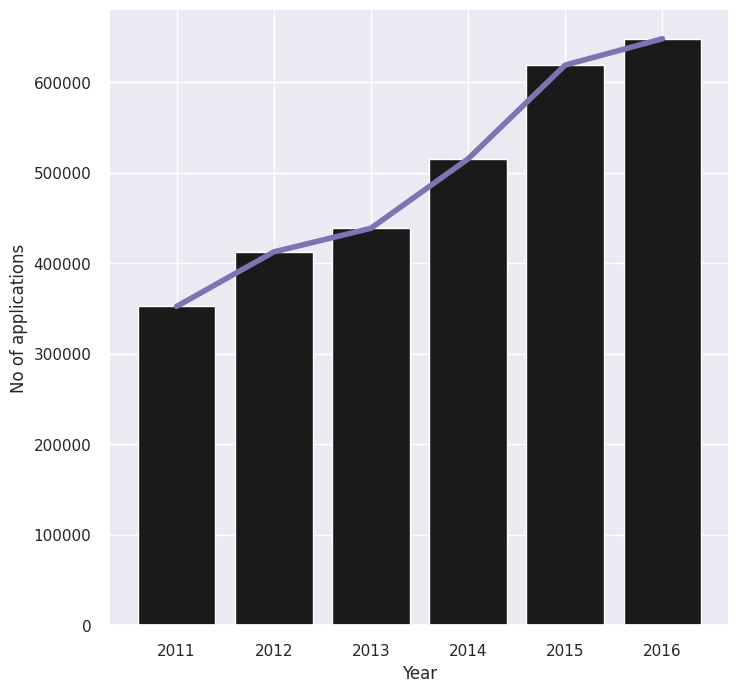

In [ ]:
plt.figure(figsize=(8,8))
plt.bar(x,y,color="k")
plt.xlabel("Year")
plt.ylabel("No of applications")
plt.plot(x,y,color="m",lw=4)

## The number of applications are increasing year by year

## Most preffered  location to work?

In [ ]:
pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df["WORKSITE"].value_counts()[0:15]

NEW YORK, NEW YORK           190863
HOUSTON, TEXAS                83385
SAN FRANCISCO, CALIFORNIA     62457
ATLANTA, GEORGIA              52008
CHICAGO, ILLINOIS             51167
SAN JOSE, CALIFORNIA          49582
SUNNYVALE, CALIFORNIA         34968
DALLAS, TEXAS                 31509
BOSTON, MASSACHUSETTS         31336
REDMOND, WASHINGTON           30574
CHARLOTTE, NORTH CAROLINA     30176
IRVING, TEXAS                 29316
MOUNTAIN VIEW, CALIFORNIA     29245
SAN DIEGO, CALIFORNIA         28656
SANTA CLARA, CALIFORNIA       27945
Name: WORKSITE, dtype: int64

In [ ]:
NEWYORK_DF=df[df["WORKSITE"]=="NEW YORK, NEW YORK"]

In [ ]:
lat1=NEWYORK_DF["lat"].unique()

In [ ]:
lon1=NEWYORK_DF["lon"].unique()

In [ ]:
import folium

In [ ]:
from folium.plugins import HeatMap

In [ ]:
new_df = df.dropna(axis=0,subset=["lon","lat"])
new_df.shape

(2877765, 10)

In [ ]:
new_df["lat"].value_counts().sort_values(ascending=False)

40.712784    193496
29.760427     83385
37.774929     62491
33.748995     52008
41.878114     51167
              ...  
42.356461        54
25.942871        54
41.542535        53
37.771907        52
39.830391        50
Name: lat, Length: 2406, dtype: int64

In [ ]:
new_df = new_df.sample(int(0.1*len(new_df)))

In [ ]:
lat=list(new_df.lat)
lng=list(new_df.lon)
pairs = list(zip(lat,lng))
map = folium.Map()
HeatMap(pairs).add_to(map)
folium.Marker(location= [lat1,lon1], popup='NEWYORK').add_to(map)


In [ ]:
map

## AS THE MAP SHOWS THE MOST POPULAR CITY IS NEWYORK

## WHAT IS THE AVERAGE SALARY OF THE DATA SCIENTIST?

-About 89100USD

In [ ]:
data_df=df[df["JOB_TITLE"]=="DATA SCIENTIST"]

In [ ]:
data_df["PREVAILING_WAGE"].mean()

89103.21180447217

# Removing outliers in wages 

In [ ]:
np.percentile(df["PREVAILING_WAGE"],[0.01,0.99])

array([15552.256, 30326.   ])

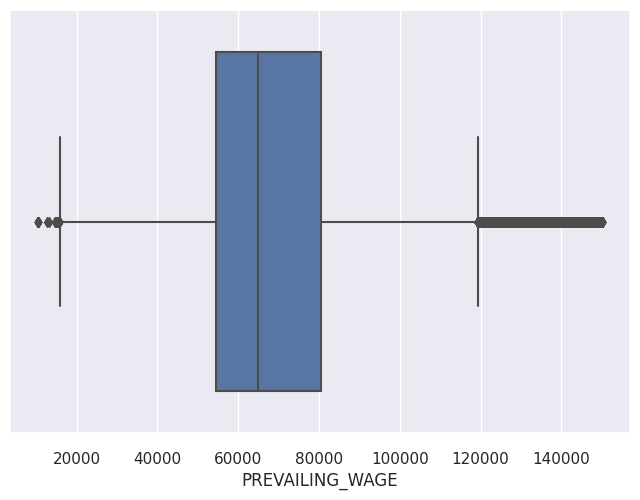

In [ ]:
total_certified_cases = df[df['CASE_STATUS']=='CERTIFIED']
certified_cases = total_certified_cases[total_certified_cases['PREVAILING_WAGE']<150000]
sns.boxplot(x=certified_cases["PREVAILING_WAGE"])

Text(0.5, 1.0, 'WAGE DISTRIBUTION BETWEEN 2011 TO 2016')

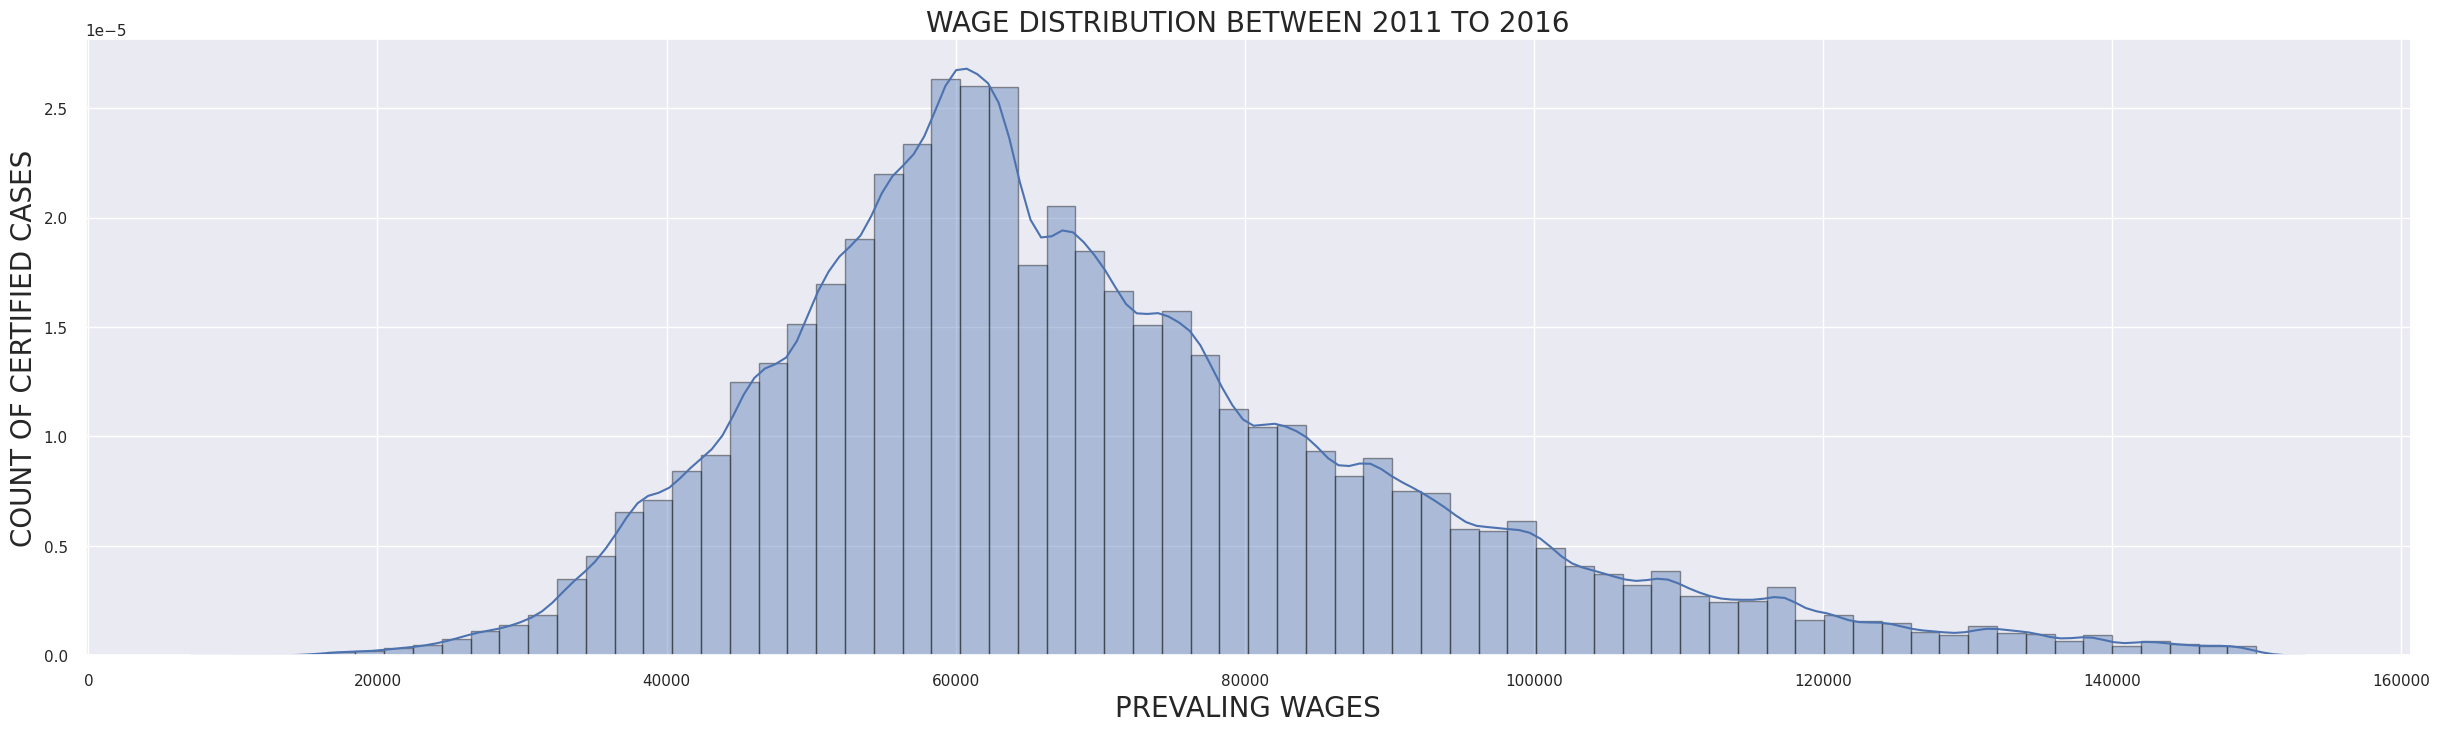

In [ ]:
plt.figure(figsize=(30,8))
sns.distplot(certified_cases['PREVAILING_WAGE'],bins=70,kde=True,hist_kws={"edgecolor": "black"})
plt.xlabel('PREVALING WAGES',size=20)
plt.ylabel('COUNT OF CERTIFIED CASES', size=20)
plt.title('WAGE DISTRIBUTION BETWEEN 2011 TO 2016',size=20)

##  which company offers wide salary range?
- Infosys,Deloitte offers wide range of salaries

In [ ]:
top_companies=df["EMPLOYER_NAME"].value_counts()[0:5].index

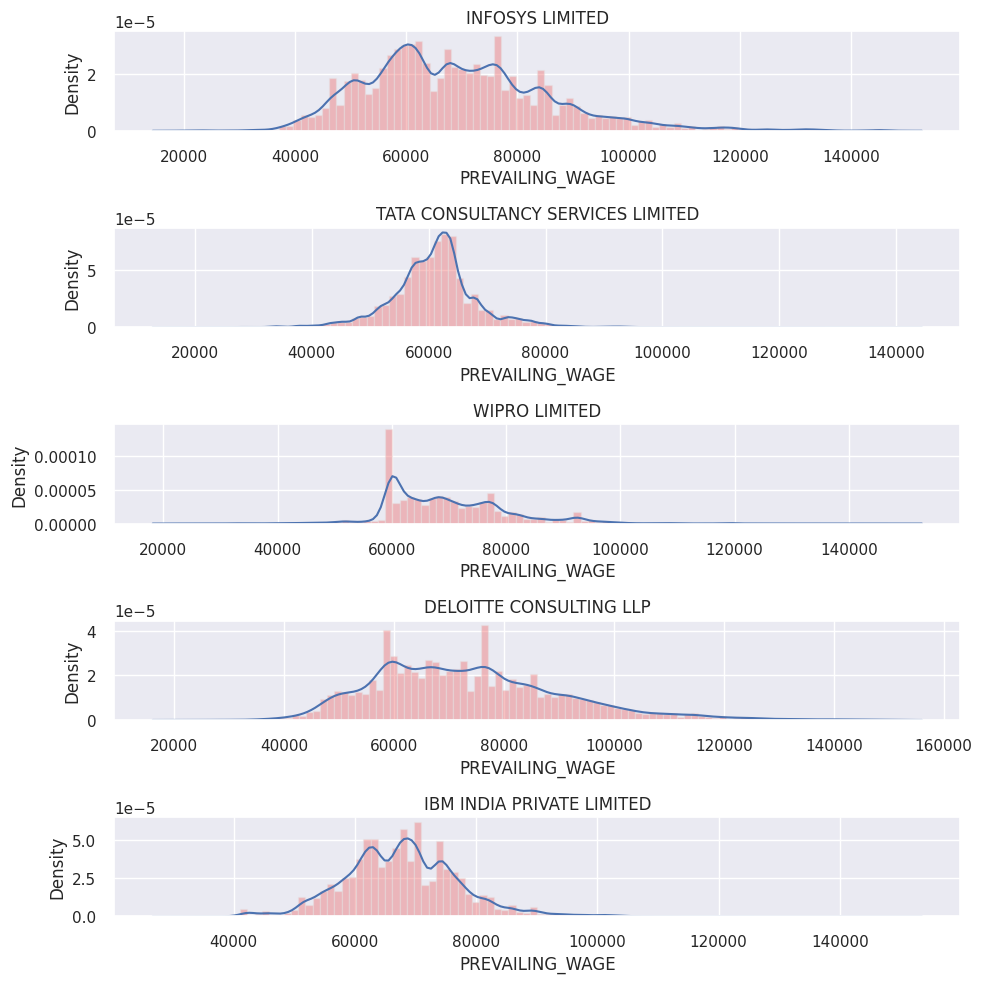

In [ ]:
f,axes = plt.subplots(nrows=5,ncols=1, figsize=(10,10),sharey=False)
rowcount=0
companies = top_companies[:5]
for company in companies:
    axes[rowcount].set_title(company)
    wage = certified_cases[certified_cases['EMPLOYER_NAME']==company]['PREVAILING_WAGE']
    sns.distplot(wage ,ax=axes[rowcount],bins=100,hist_kws= {"edgecolor":"#E6E6E6", "color": "#EE6666"}, kde=True)
    rowcount+=1
    
plt.tight_layout()

## which job title has high pay?
- physiciands and software developers are getting high salaries

In [ ]:
Highpay_jobs=certified_cases.groupby("SOC_NAME")["PREVAILING_WAGE"].mean().sort_values(ascending=False)

In [ ]:
top10_highpays=Highpay_jobs[0:10]

Text(0.5, 1.0, 'HIGHEST PAYING JOBS IN 2011-2016')

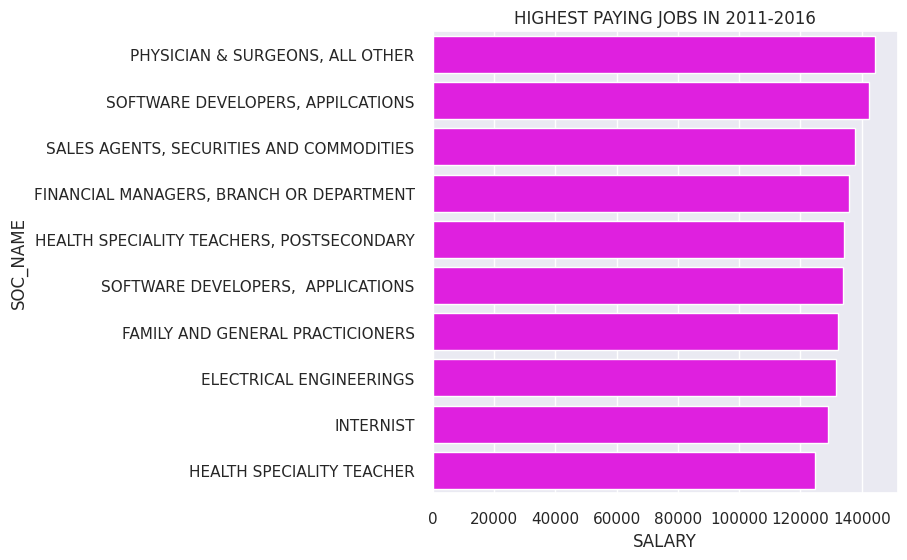

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x=top10_highpays.values,y=top10_highpays.index,color="magenta")
plt.xlabel("SALARY")
plt.title("HIGHEST PAYING JOBS IN 2011-2016")

 ## What is the scope of data scientist?
- Looks like data scientist is a promising career

In [ ]:
data_scientist_df=total_certified_cases[total_certified_cases["JOB_TITLE"]=="DATA SCIENTIST"]

In [ ]:
ds=data_scientist_df.groupby("YEAR").size()

Text(0, 0.5, 'No_of_cerified_cases')

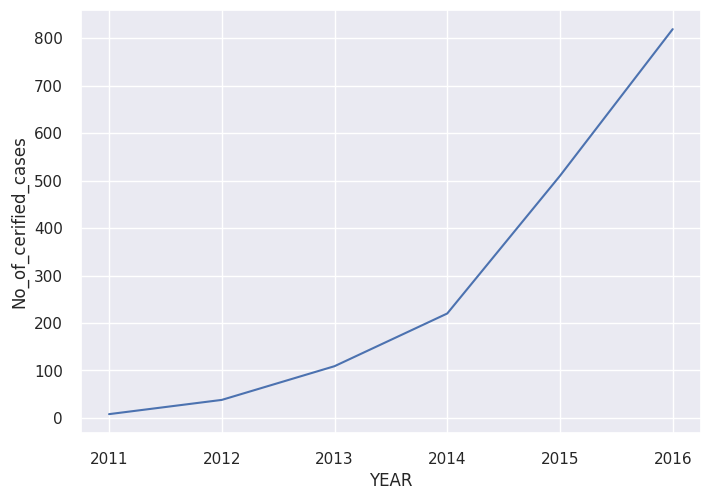

In [ ]:

sns.set_theme(style="darkgrid")

sns.lineplot(x=ds.index, y=ds.values)
plt.ylabel("No_of_cerified_cases")
             

##  Part time or Full time which is paying more?
- Part timers are usually getting  40k to 60k dollars, where as the full timers are getting almost 40-120k dollars

In [ ]:
certified_cases.groupby("FULL_TIME_POSITION")

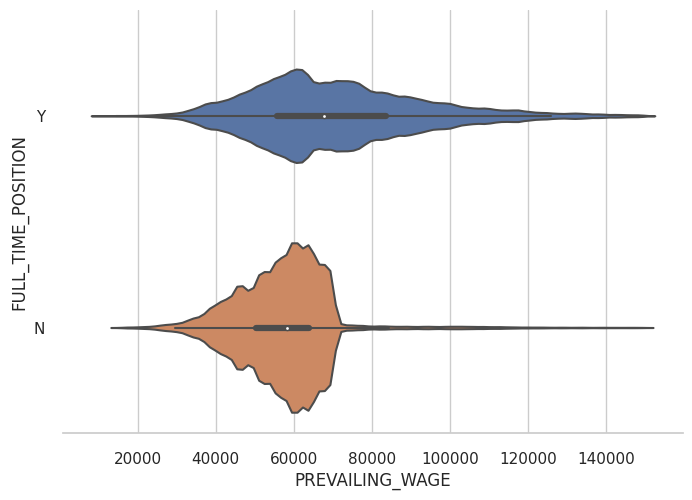

In [ ]:

sns.set_theme(style="whitegrid")

sns.violinplot(data=certified_cases,x="PREVAILING_WAGE",y="FULL_TIME_POSITION")
sns.despine(left=True)

## FINALLY SOME AUTOMATED EDA

In [ ]:


import dtale
import dtale.app as dtale_app

dtale_app.USE_COLAB = True
import dtale.global_state as global_state

global_state.set_chart_settings({'scatter_points': 15000, '3d_points': 40000})
dtale.show(df)

https://r4nnedl86bf-496ff2e9c6d22116-40001-colab.googleusercontent.com/dtale/main/2

## ASK QUESTIONS:
- Which company is recruiting most number of people from other countries?
- which job has highest number of applications?
- What is the average salary for each job description
- How many applications have been rejected/approved per year?
- Application rate is increasing/decreasing year by year?
- Most preffered  location to work?
- Which company offers high pay?
- What is the average salary of the data scientist?
- which company offers wide salary range?
- which job title has high pay?
- What is the scope of data scientist?
- Part time or Full time which is paying more?
